# Analisis exploratorio de datos

In [2]:
import mord
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

## Cargado de datos

In [3]:
df_url='https://docs.google.com/spreadsheets/d/1NJiaIRABEh1mJrqzP6bAYBkhBruBwUUzplHdXViv9-g/export?format=csv'
df=pd.read_csv(df_url)

## Funciones

In [4]:
def Summary(data, sheet):
    print(f"Hoja: {sheet}")

    # Crear la tabla de resumen
    resumen = {
        "Cantidad de filas": data.shape[0],
        "Cantidad de columnas": data.shape[1],
        "Datos faltantes": data.isnull().sum().sum(),
        "Filas duplicadas": data.duplicated().sum()
    }

    # Convertir el resumen en un DataFrame
    ResumenHoja = pd.DataFrame(resumen, index=["Resumen"])
    print("\nResumen:")
    display(ResumenHoja)

    print("\nEncabezado:")
    display(data.head())

## Analisis exploratorio de datos

In [5]:
Summary(df,'Datos pacientes')

Hoja: Datos pacientes

Resumen:


,Cantidad de filas,Cantidad de columnas,Datos faltantes,Filas duplicadas
Resumen,212691,17,0,0



Encabezado:


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [7]:
df.drop(columns='Patient_ID').describe()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,5.045102,2.001727,8.246204,2.503403
std,21.632815,2.860264,0.866248,2.164188,1.444631
min,15.000000,0.100000,0.500000,4.500000,0.000000
25%,33.000000,2.570000,1.250000,6.370000,1.250000
50%,52.000000,5.040000,2.000000,8.240000,2.510000
75%,71.000000,7.520000,2.750000,10.120000,3.760000
max,89.000000,10.000000,3.500000,12.000000,5.000000


se realiza una tabla de frecuencias y un grafico de barras para la variable respuesta

In [8]:
df.Thyroid_Cancer_Risk.value_counts()

Thyroid_Cancer_Risk
Low       108388
Medium     72400
High       31903
Name: count, dtype: int64

In [9]:
sns.set_style("whitegrid")

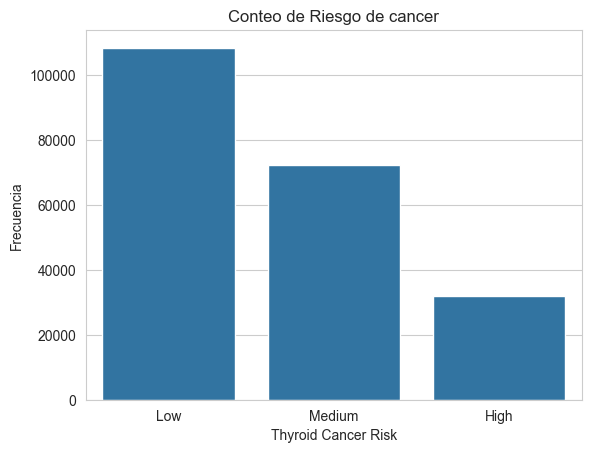

In [10]:
plt.title('Conteo de Riesgo de cancer')
sns.countplot(x=df.Thyroid_Cancer_Risk)
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Frecuencia')
plt.show()

podemos observar que el dataset esta desbalanceado, tomaremos en cuenta esto mas adelante

realizaremos graficas de cada variable del dataset

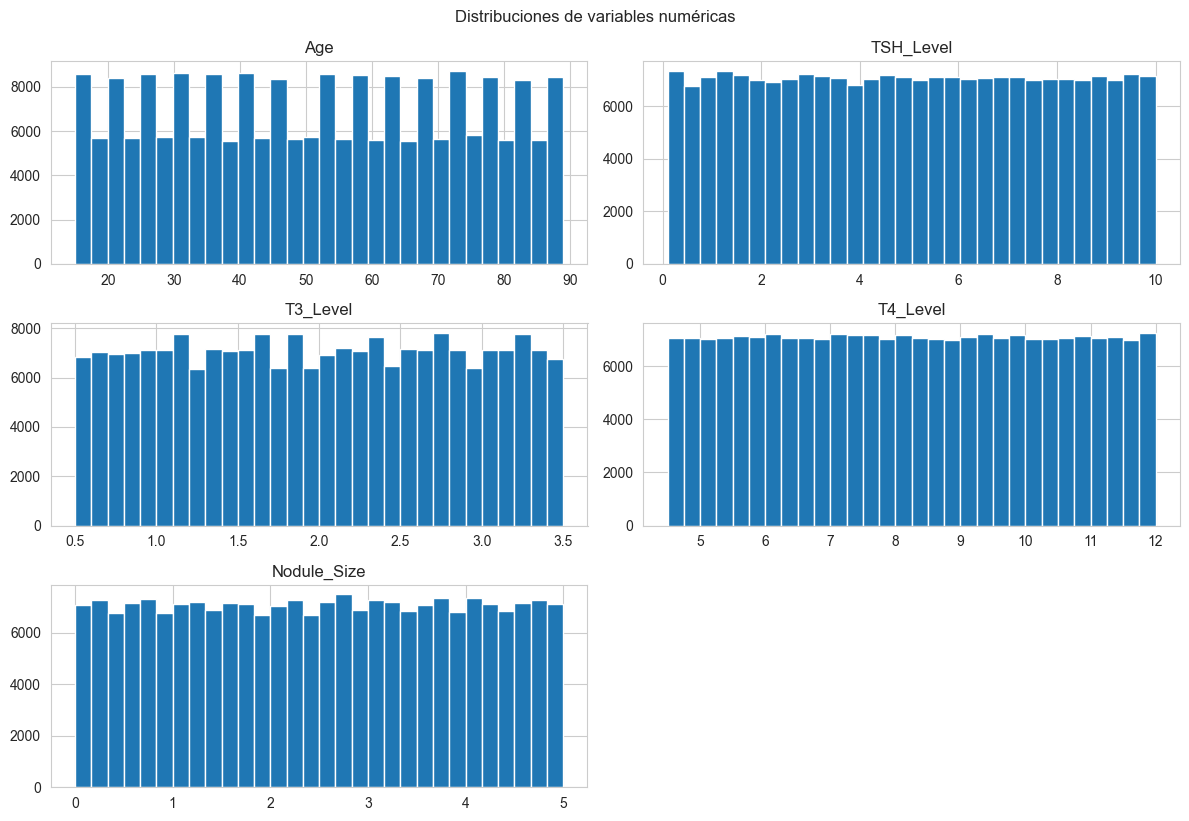

In [11]:
numericas = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
df[numericas].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.suptitle('Distribuciones de variables numéricas', y=1.02)
plt.show()

se realiza lo mismo para las variables categoricas y tambien se realiza el conteo de cada categoria

In [12]:
categoricas = ['Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure',
               'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Diagnosis']

Gender
Female    127527
Male       85164
Name: count, dtype: int64


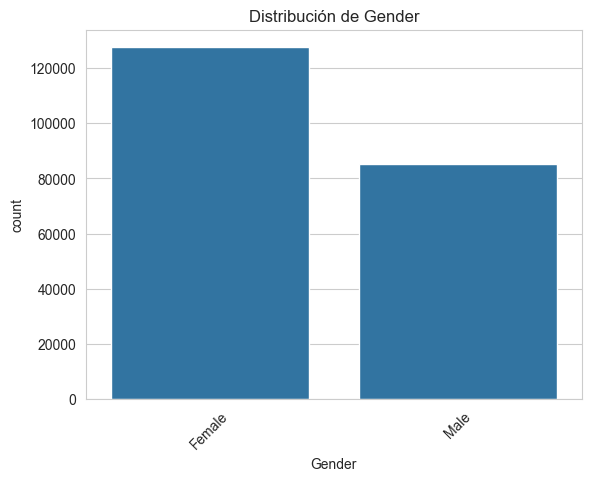

Country
India          42496
China          31978
Nigeria        31918
Brazil         21413
Russia         21297
Japan          16867
South Korea    14965
UK             10642
USA            10558
Germany        10557
Name: count, dtype: int64


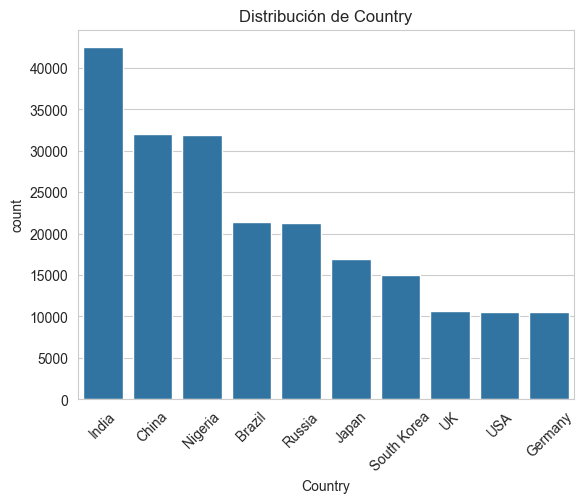

Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64


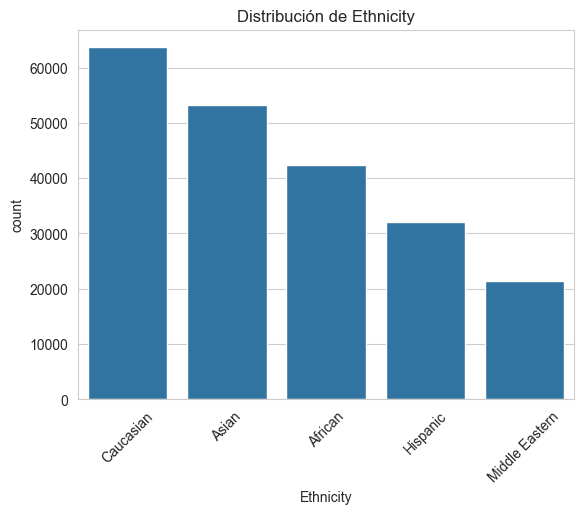

Family_History
No     148866
Yes     63825
Name: count, dtype: int64


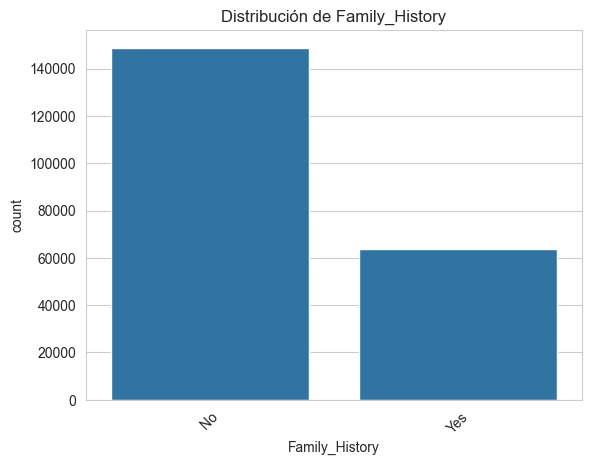

Radiation_Exposure
No     180831
Yes     31860
Name: count, dtype: int64


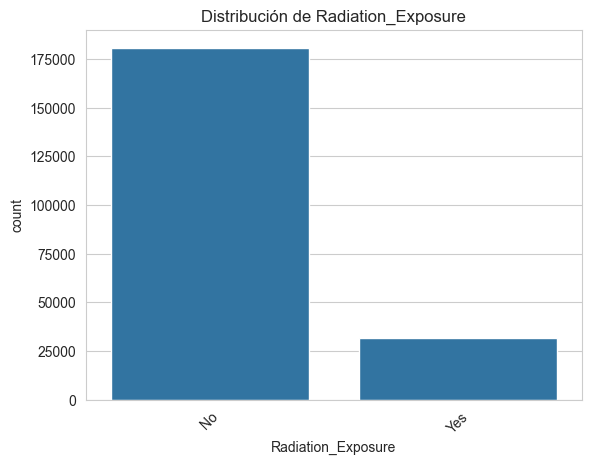

Iodine_Deficiency
No     159673
Yes     53018
Name: count, dtype: int64


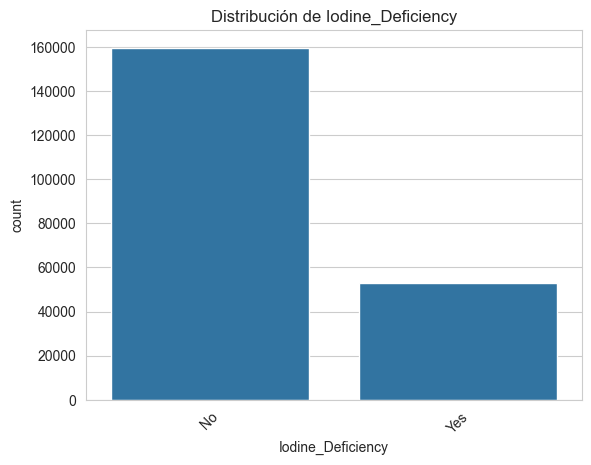

Smoking
No     170260
Yes     42431
Name: count, dtype: int64


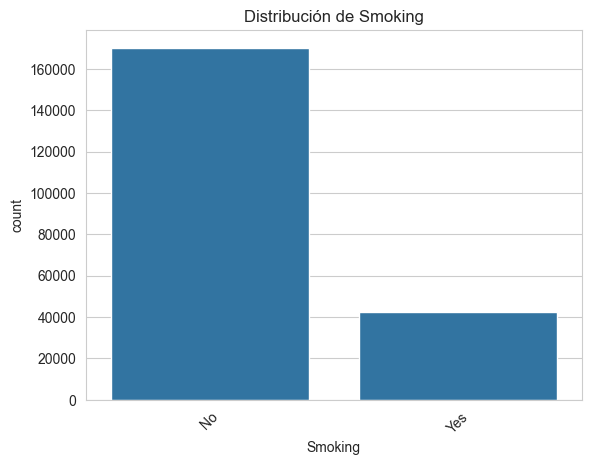

Obesity
No     148805
Yes     63886
Name: count, dtype: int64


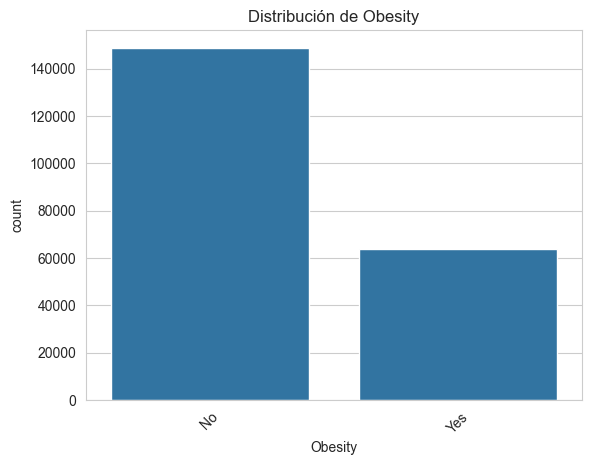

Diabetes
No     170098
Yes     42593
Name: count, dtype: int64


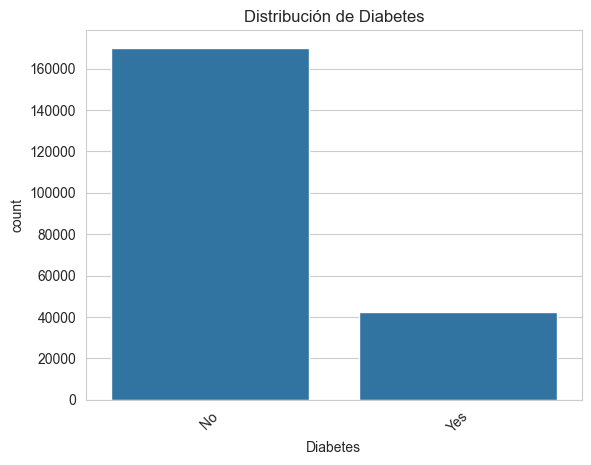

Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64


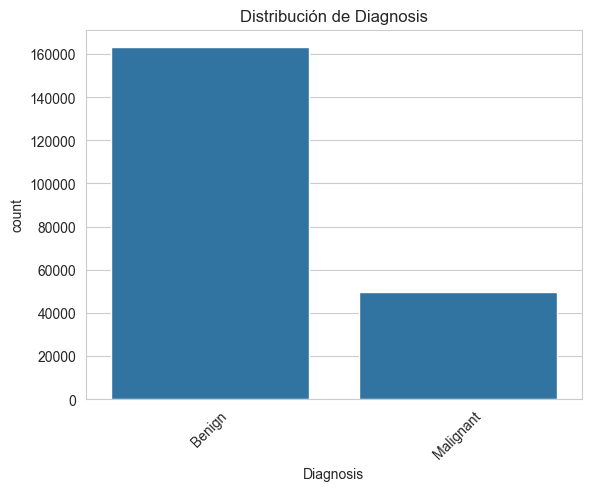

In [13]:
for col in categoricas:
    print(df[col].value_counts())
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

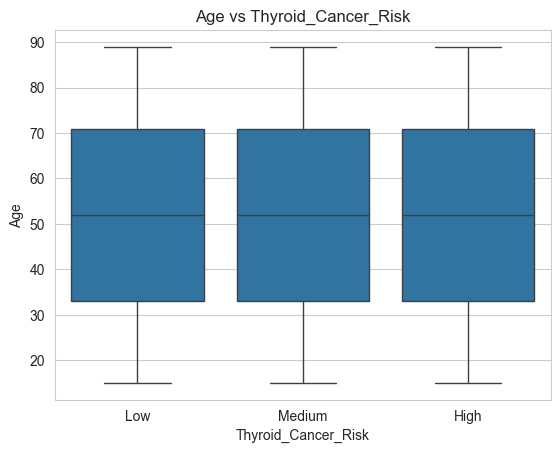

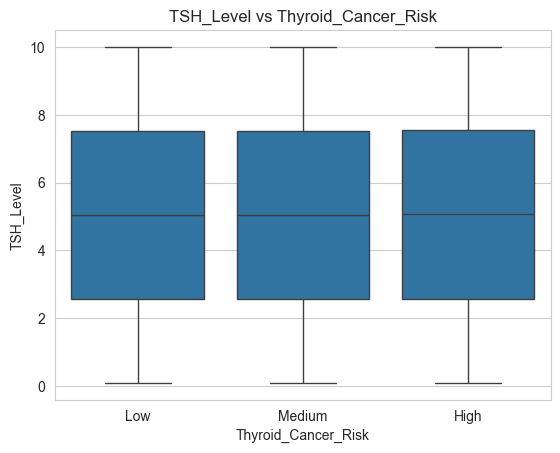

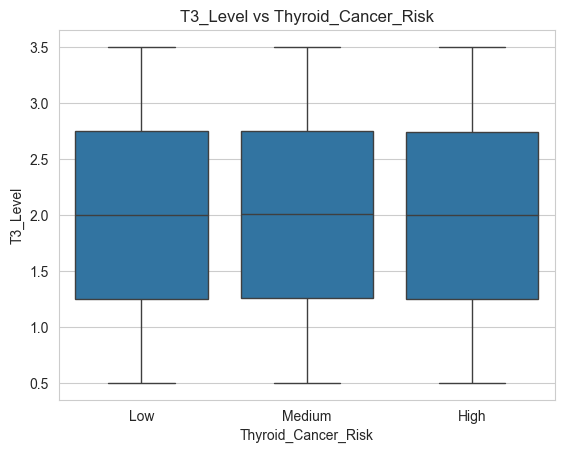

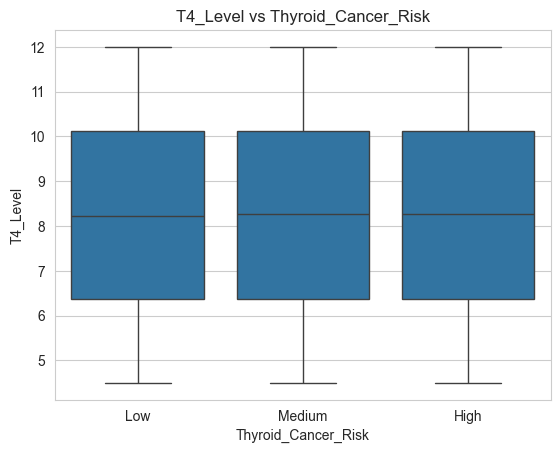

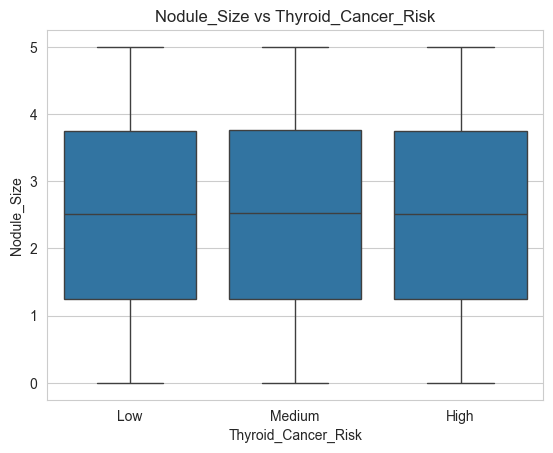

In [14]:
for col in numericas:
    sns.boxplot(data=df, x="Thyroid_Cancer_Risk", y=col, order=['Low', 'Medium', 'High'])
    plt.title(f'{col} vs {"Thyroid_Cancer_Risk"}')
    plt.show()


Se realizan comparaciones entre la variable objetivo y las categoricas y se examina el numero de personas que pertenecen a cada una de las categorias con respecto a las otras variables

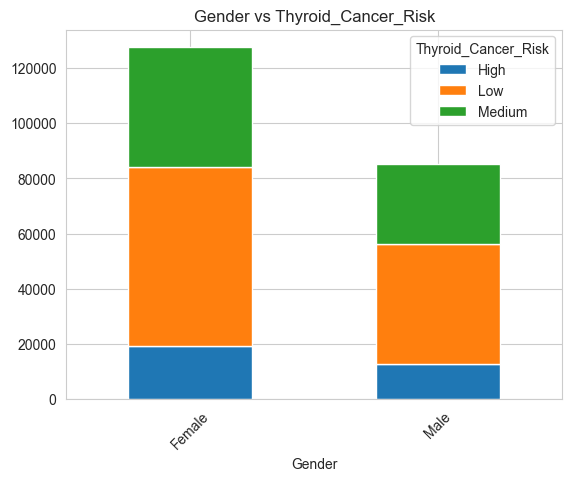

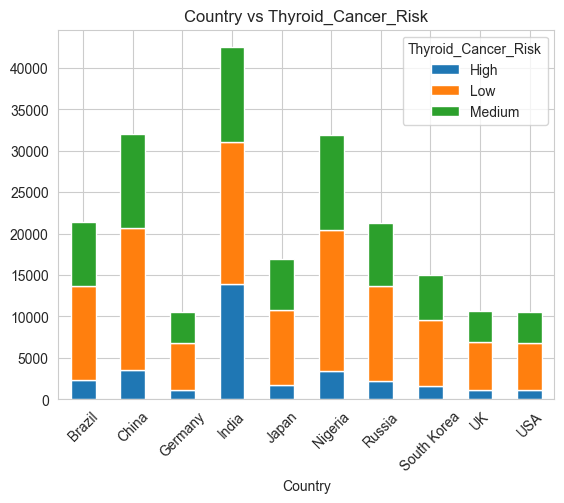

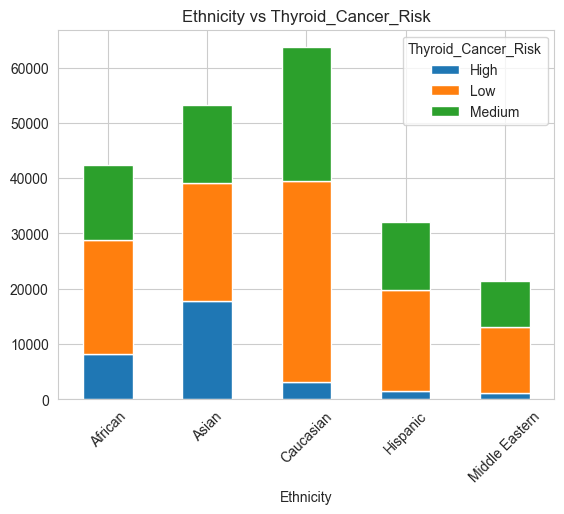

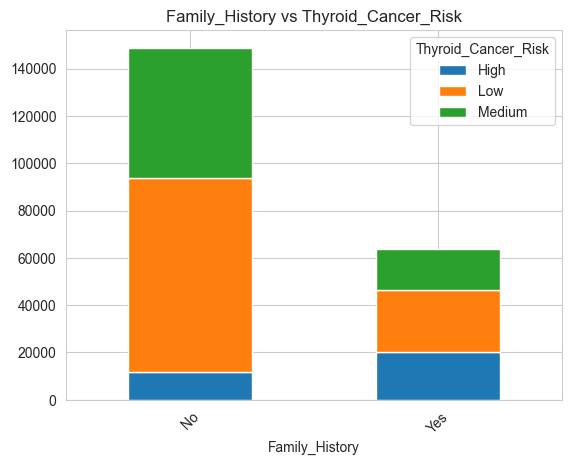

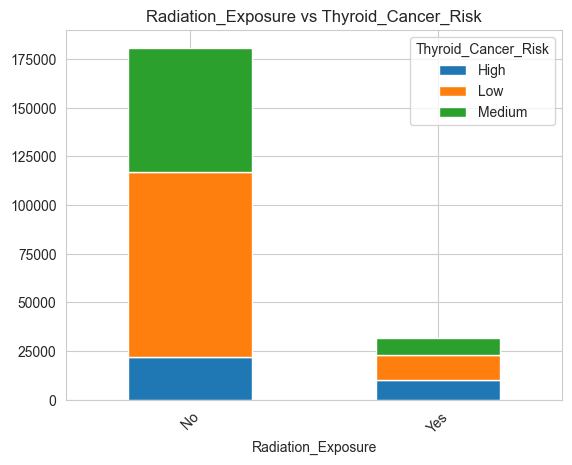

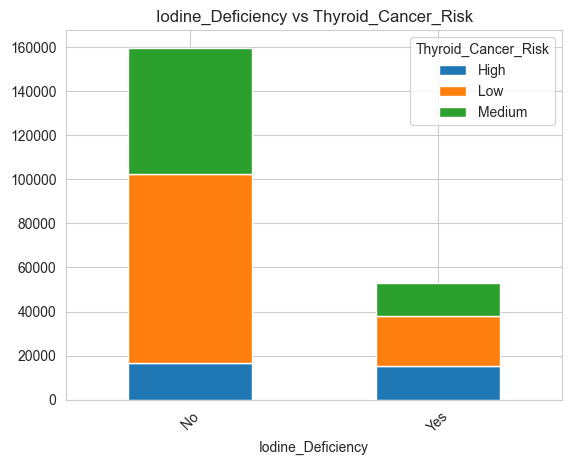

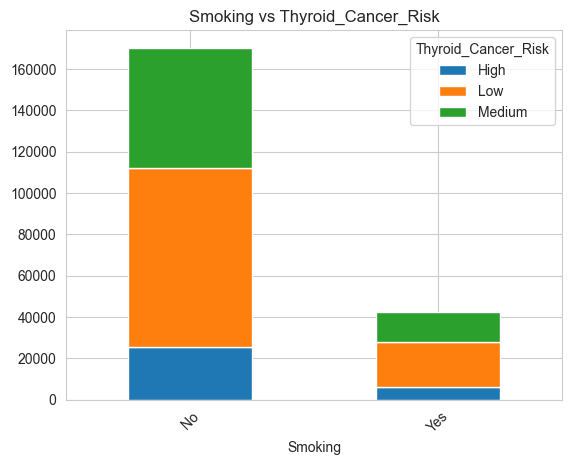

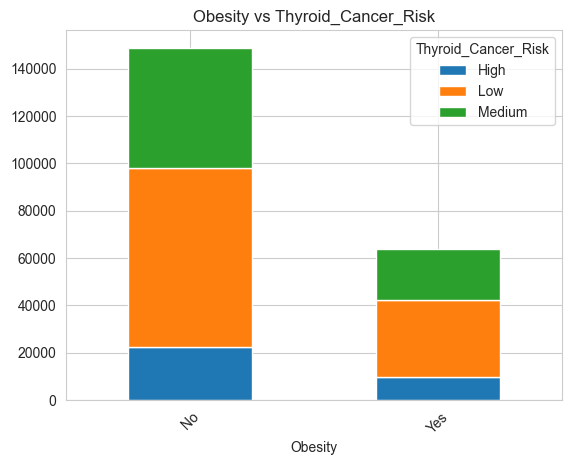

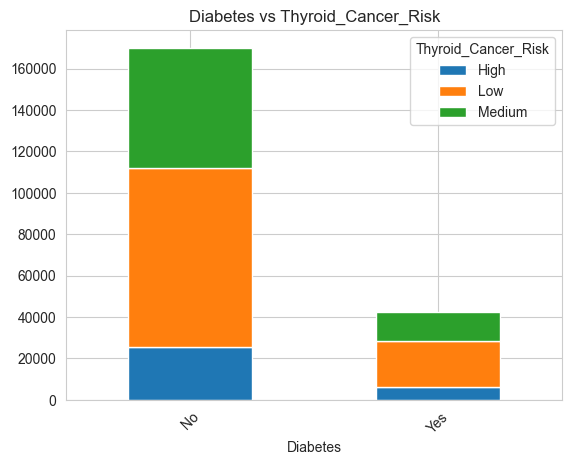

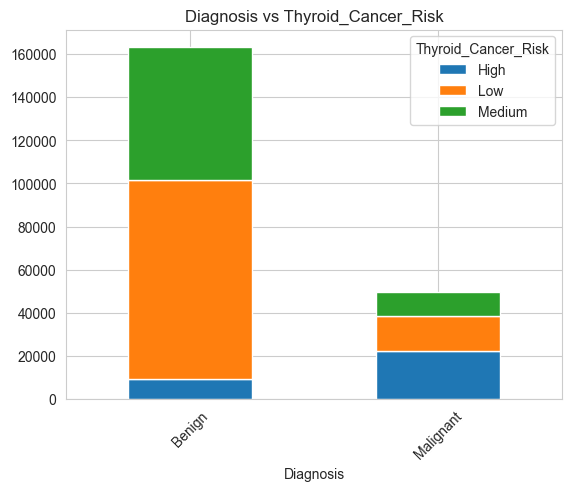

In [15]:
for col in categoricas:
    tabla = pd.crosstab(df[col], df['Thyroid_Cancer_Risk'])
    tabla.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Thyroid_Cancer_Risk')
    plt.xticks(rotation=45)
    plt.show()

codificamos las variables categoricas a la hora de analizar las correlaciones y la multicolinealidad

In [16]:
df_mul = df.copy()
df_mul=df_mul.drop(columns=['Patient_ID'])
binarias=['Gender','Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes','Diagnosis']
for col in binarias:
  df_mul[col]=df_mul[col].map({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1, 'Benign': 0, 'Malignant': 1})

In [17]:
df_mul=pd.get_dummies(df_mul,columns=['Country','Ethnicity'],drop_first=True,dtype=int)

In [18]:
Orden_objetivo={'Low': 0, 'Medium': 1, 'High': 2}
df_mul['Thyroid_Cancer_Risk']=df_mul['Thyroid_Cancer_Risk'].map(Orden_objetivo)

realizamos la matriz de correlacion

In [19]:
matriz_correlacion=df_mul.corr()

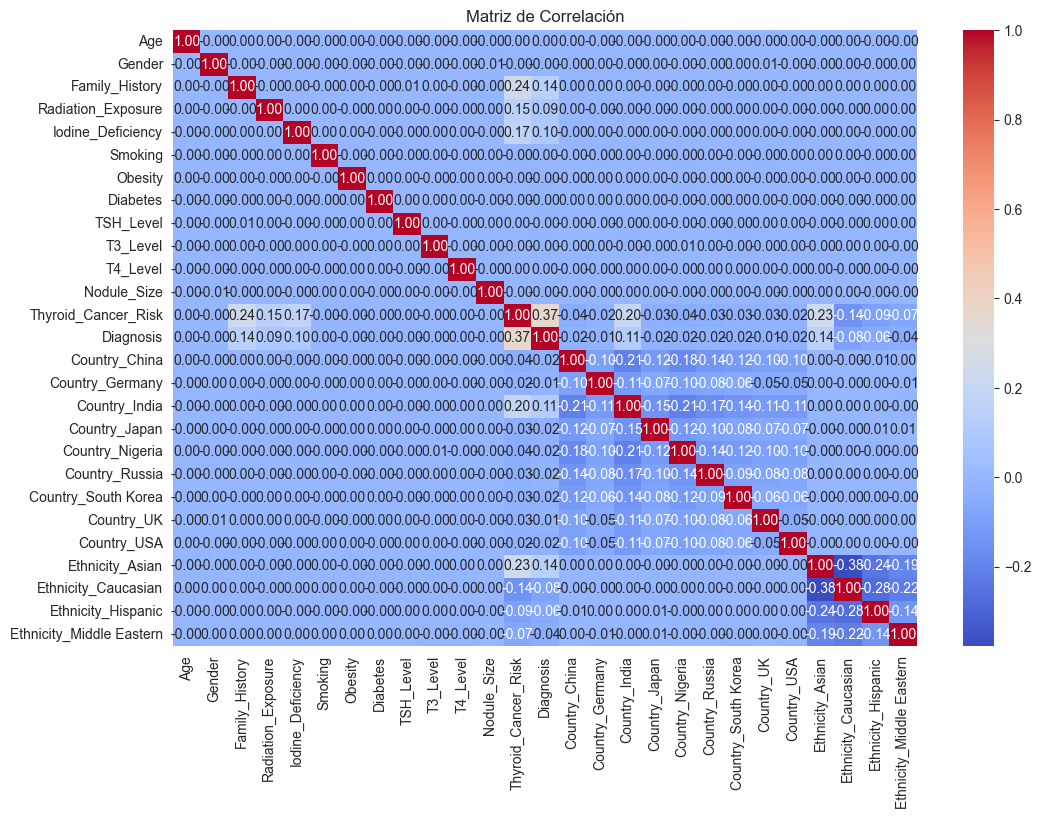

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

podemos observar que la mayoria de variables tiene una muy baja correlacion con respecto a la variable objetivo excepto diagnosis

Realizamos el calculo de VIF para determinar si hay variables que pueden afectar el modelo de gran manera

In [21]:
X_vif=df_mul[numericas+binarias+[col for col in df_mul.columns if col.startswith('Country_') or col.startswith('Ethnicity_')]]
vif = pd.DataFrame()
vif['Variable'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nValores de VIF:")
print(vif.sort_values('VIF', ascending=False))


Valores de VIF:
                    Variable        VIF
3                   T4_Level  10.841893
0                        Age   5.943180
2                   T3_Level   5.628250
1                  TSH_Level   3.844363
4                Nodule_Size   3.751566
15             Country_India   2.603112
23       Ethnicity_Caucasian   2.351782
17           Country_Nigeria   2.185622
13             Country_China   2.185354
22           Ethnicity_Asian   2.138550
18            Country_Russia   1.791591
24        Ethnicity_Hispanic   1.681614
5                     Gender   1.643899
16             Country_Japan   1.627178
19       Country_South Korea   1.556206
25  Ethnicity_Middle Eastern   1.451051
6             Family_History   1.449898
10                   Obesity   1.417654
12                 Diagnosis   1.404412
20                Country_UK   1.395621
21               Country_USA   1.392078
14           Country_Germany   1.390770
8          Iodine_Deficiency   1.338625
11                  Dia

La variable T4-level tiene un VIF mayor que 10 por lo que la podemos eliminar del dataframe para el analisis de los modelos

In [22]:
df_mul=df_mul.drop(columns=['T4_Level'])

# Evaluacion del dataset mediante regresion logistica

Se realizara una evaluacion del dataset reducido para saber si se le puede aplicar machine learning, utilizando la libreria mord para poder hacer regresion logistica ordinal, pero debemos recordar que el dataset esta desbalanceado por lo que vamos a realizar una pequeña comparacion cuando se realiza la regresion logistica con y sin balanceo

In [23]:
X = df_mul.drop(columns=['Thyroid_Cancer_Risk'])
y = df_mul['Thyroid_Cancer_Risk']

In [24]:
numericas = ['Age', 'TSH_Level', 'T3_Level', 'Nodule_Size']
scaler = StandardScaler()
X[numericas] = scaler.fit_transform(X[numericas])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
model = mord.LogisticIT()
model.fit(X_train, y_train)

LogisticIT()

In [27]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16258  4939   481]
 [10829  3334   317]
 [  370  2248  3763]]
              precision    recall  f1-score   support

           0       0.59      0.75      0.66     21678
           1       0.32      0.23      0.27     14480
           2       0.83      0.59      0.69      6381

    accuracy                           0.55     42539
   macro avg       0.58      0.52      0.54     42539
weighted avg       0.53      0.55      0.53     42539



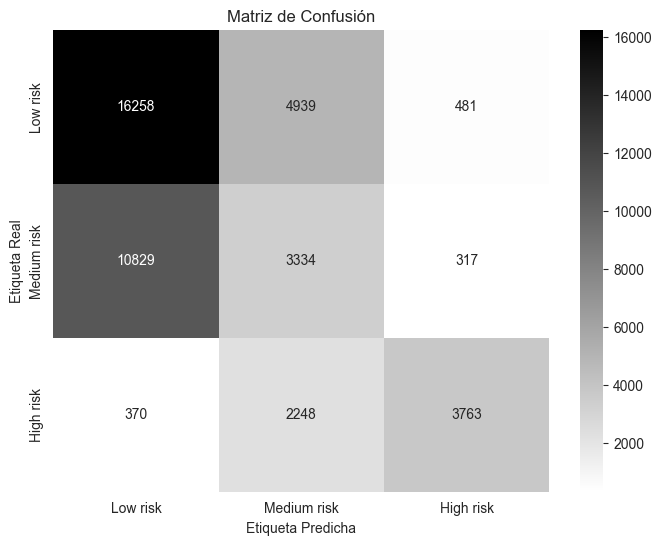

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred).astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="gray_r", 
            xticklabels=['Low risk', 'Medium risk', 'High risk'], 
            yticklabels=['Low risk', 'Medium risk', 'High risk'])

plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

se realiza el balanceo mediante SMOTE

In [29]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

c:\Users\migue\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [30]:
model_bal = mord.LogisticIT()
model_bal.fit(X_train_res, y_train_res)

LogisticIT()

In [31]:
y_pred_bal = model_bal.predict(X_test)
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

[[11672  7498  2508]
 [ 7735  5041  1704]
 [    0   729  5652]]
              precision    recall  f1-score   support

           0       0.60      0.54      0.57     21678
           1       0.38      0.35      0.36     14480
           2       0.57      0.89      0.70      6381

    accuracy                           0.53     42539
   macro avg       0.52      0.59      0.54     42539
weighted avg       0.52      0.53      0.52     42539



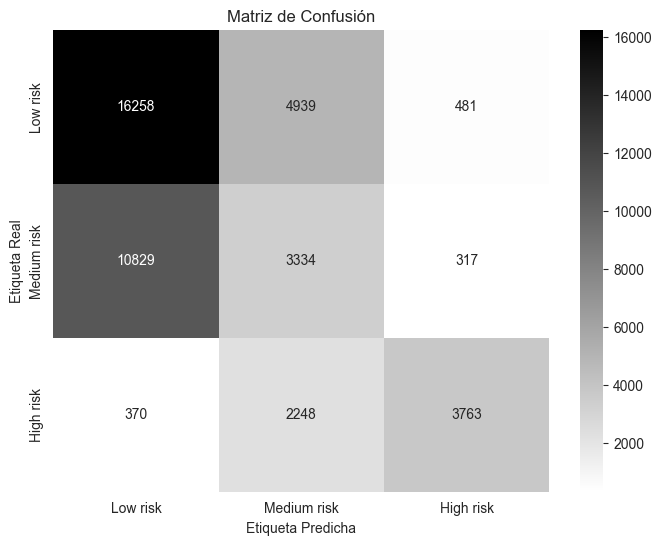

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred).astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="gray_r", 
            xticklabels=['Low risk', 'Medium risk', 'High risk'], 
            yticklabels=['Low risk', 'Medium risk', 'High risk'])

plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

Se realiza el modelo de regresion logistica sometiendose a los mismos datos de la forma vista en clase para comparar sus resultados y ver si la libreria genera alguna mejora significativa de rendimiento

In [33]:
LogMod =  LogisticRegression()
LogMod.fit(X_train_res, y_train_res)

LogisticRegression()

In [34]:
y_pred_log = LogMod.predict(X_test)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[10042  9384  2252]
 [ 6676  6332  1472]
 [  468   120  5793]]
              precision    recall  f1-score   support

           0       0.58      0.46      0.52     21678
           1       0.40      0.44      0.42     14480
           2       0.61      0.91      0.73      6381

    accuracy                           0.52     42539
   macro avg       0.53      0.60      0.55     42539
weighted avg       0.53      0.52      0.51     42539



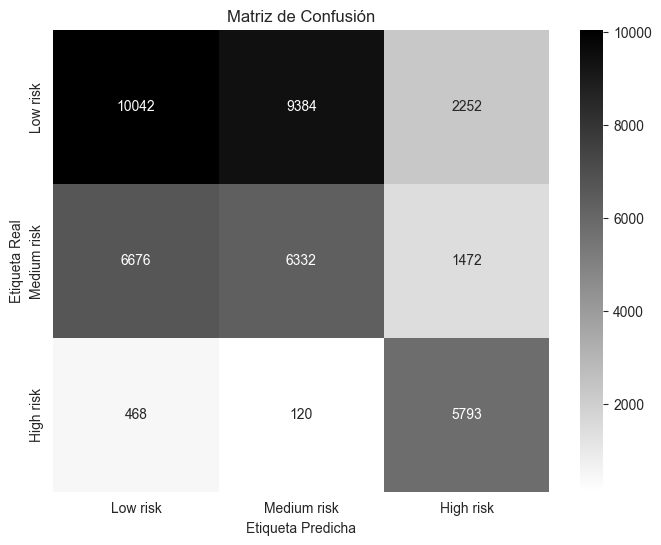

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred_log).astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="gray_r", 
            xticklabels=['Low risk', 'Medium risk', 'High risk'], 
            yticklabels=['Low risk', 'Medium risk', 'High risk'])

plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

Conclusiones: 


En la comparación entre los dos modelos de clasificación multiclase, se observa que cada uno presenta ventajas y desventajas específicas según la clase y el tipo de error que se desea minimizar. El modelo basado en MORD (regresión logística ordenada) muestra una mayor precisión en la clasificación de la clase Low risk, logrando un recall del 75% y un F1-score de 0.66, lo cual indica que es eficaz para identificar correctamente a la mayoría de los casos de bajo riesgo. Además, destaca por su alta precisión en la clase High risk, alcanzando un 83%, lo que significa que, cuando predice un caso como de alto riesgo, es muy probable que acierte. Sin embargo, este modelo presenta una debilidad importante en la clasificación de Medium risk, donde el recall es de solo 23%, lo que implica que muchos casos de riesgo medio son mal clasificados, principalmente como Low risk.

Por otro lado, el modelo de regresión logística multinomial estándar ofrece un rendimiento más equilibrado entre las clases. Aunque su precisión general es ligeramente menor (accuracy de 53% frente a 55% de MORD), logra un mejor desempeño en la clase Medium risk con un recall del 35% y un F1-score de 0.36, reduciendo la cantidad de errores que podrían llevar a subestimar riesgos intermedios. Además, su capacidad para identificar correctamente casos de High risk es superior en términos de recall (89%), lo que significa que detecta casi todos los casos verdaderamente peligrosos, aunque a costa de una menor precisión (57%), lo cual se traduce en más falsos positivos.

En términos globales, MORD puede ser preferible en contextos donde es prioritario evitar falsos positivos en riesgos altos y se desea una clasificación conservadora, especialmente precisa para Low risk. En cambio, la regresión logística multinomial es más adecuada cuando es crucial detectar todos los casos de Medium y High risk, incluso si eso implica cometer algunos errores al clasificar riesgos bajos. La elección entre ambos modelos dependerá, por tanto, de la prioridad práctica entre minimizar falsos positivos o falsos negativos según el nivel de riesgo.

Con estos resultados se Concluye que es apropiado realizar tecnicas de machine learning para mejorar los resultados

## Se realiza un tercer modelo cambiando el orden de las operaciones (primero division y luego procesamiento)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test_res)

In [54]:
smote = SMOTE(random_state =42 )
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

c:\Users\migue\miniconda3\envs\ml_venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [57]:
ModelOr =  LogisticRegression()
ModelOr.fit(X_train_res, y_train_res)

LogisticRegression()

In [60]:
y_pred_Or = ModelOr.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_Or))
print(classification_report(y_test, y_pred_Or))

[[ 9237 10622  1819]
 [ 6170  7117  1193]
 [  497   325  5559]]
              precision    recall  f1-score   support

           0       0.58      0.43      0.49     21678
           1       0.39      0.49      0.44     14480
           2       0.65      0.87      0.74      6381

    accuracy                           0.52     42539
   macro avg       0.54      0.60      0.56     42539
weighted avg       0.53      0.52      0.51     42539



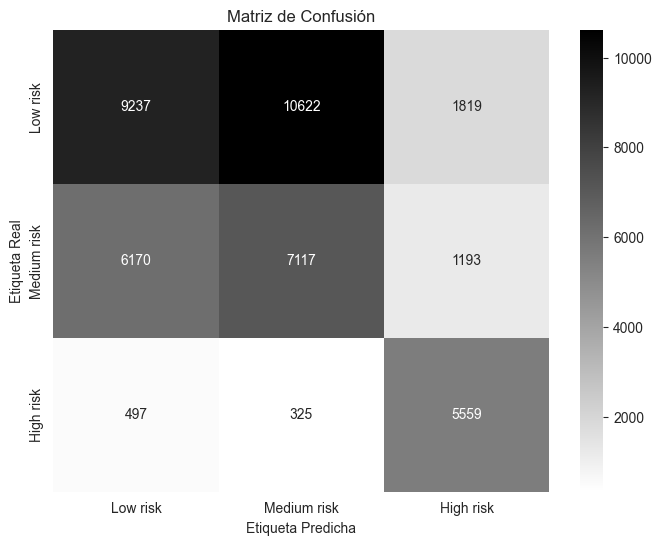

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred_Or).astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="gray_r", 
            xticklabels=['Low risk', 'Medium risk', 'High risk'], 
            yticklabels=['Low risk', 'Medium risk', 'High risk'])

plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

Conclusiones:
se observan muy leves cambios con respecto a la version anterior, sin embargo para nuestro modelo podemos ver que el recall de la clase 1 y 3 es mayor para el modelo anterior que para el nuevo modelo, lo que lo vuelve mas optimo